In [2]:
cd "~/Snudda"

/home/ubuntu/Snudda


### The network has been already built on the Striatum_1000.ipynb. We are skipping the creation and going directly to the simulation part.
## Simulate the network

Set up striatal network of 100 neurons. This writes the configuration file `network-config.json` (see the last line of the output). Option `--overwrite` allows to overwrite the network's directory if it exists.

In [ ]:
!snudda init networks/net_1000 --size 1000 --overwrite

Place the neurons based on the network config file. Positions are written to the file `network-neuron-positions.hdf5`.

In [ ]:
!snudda place networks/net_1000

Detect the apposition points where axons and dendrites of different neurons overlap.  
*-- this took about 50 minutes*

In [ ]:
!snudda detect networks/net_1000

Prune the detected appositions to get the set of synapses.

In [ ]:
!snudda prune networks/net_1000

Generate external input events for the network. A 1 second duration of the simulation is reserved.

In [ ]:
!snudda input networks/net_1000 --input snudda/data/config/input-tinytest-v6.json --time 1.0

### Compile MOD files
*not necessary - requirementes are already met by following the instructions.txt*

In [8]:
#!nrnivmodl snudda/data/cellspecs-v2/mechanisms

### Run the simulation

Option `--time` defines duration of the simulation, in seconds. It can't be longer than the duration of the external input reserved above. Try 100 milliseconds for a very short simulation. -> *if we are increasing simulation time, increase input time as well* -- *took 3 hours *

#### Here we run a 500 ms simulation, took about 9 hours.

In [3]:
!snudda simulate networks/net_1000/ --time 0.5 --input networks/net_1000/input-spikes.hdf5 --voltOut networks/net_1000/simulation/volt.txt

--No graphics will be displayed.
Using input file networks/net_1000/input-spikes.hdf5
args: Namespace(action='simulate', cont=False, disableConnection=None, disableGJ=False, h5legacy=False, hvsize=None, input='networks/net_1000/input-spikes.hdf5', inputFile=None, mechDir=None, mergeonly=False, nchannels=1, networkFile=None, overwrite=False, path='networks/net_1000', profile=False, recordGapJunctions=None, recordPointProcess=None, size=None, spikesOut=None, time=0.5, verbose=False, voltOut='networks/net_1000/simulation/volt.txt', volumeID=None)
Using networkFile: networks/net_1000/network-pruned-synapses.hdf5
Using inputFile: networks/net_1000/input-spikes.hdf5
Using logFile: networks/net_1000/log/network-simulation-log.txt
I am node 0
Worker 0: Loading network from networks/net_1000/network-pruned-synapses.hdf5
Loading networks/net_1000/network-pruned-synapses.hdf5
Loading config data from HDF5
999 neurons with 313665 synapses and 90 gap junctions
Load done. 0.7855288809514605
Loading 

## Plot simulation results

In [4]:
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-x6rl8r5u because the default path (/home/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


See the spike raster plot for all cell types.

Loading networks/net_1000/network-pruned-synapses.hdf5
Loading config data from HDF5


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-0hp2nvzx because the default path (/home/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


999 neurons with 313665 synapses and 90 gap junctions
Load done. 0.7919147573411465
Sort the traces
Sort the traces


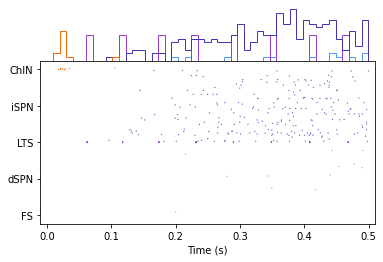

<Figure size 432x288 with 0 Axes>

Saving networks/net_1000/figs/network-output-spikes-666-colour.png


<Figure size 432x288 with 0 Axes>

In [4]:
from snudda.plotting.Network_plot_spike_raster import NetworkPlotSpikeRaster

fileName = "networks/net_1000/simulation/network-output-spikes-666.txt"
networkFile = "networks/net_1000/network-pruned-synapses.hdf5"
endTime = 0.5
npsr = NetworkPlotSpikeRaster(fileName,networkFile,skipTime=0.0,
                                  endTime=endTime,
                                  typeOrder=["FSN","dSPN","LTS","iSPN","ChIN"])

Check voltage traces for randomly the selected cells.

Unable to guess ID, using 666.
Loading networks/net_1000/network-pruned-synapses.hdf5
Loading config data from HDF5
999 neurons with 313665 synapses and 90 gap junctions
Load done. 0.17935130186378956
!!! Excluding first 0s from the plot
Plotting traces: [0, 2, 5, 6, 9]
Plotted 5 traces (total 999)


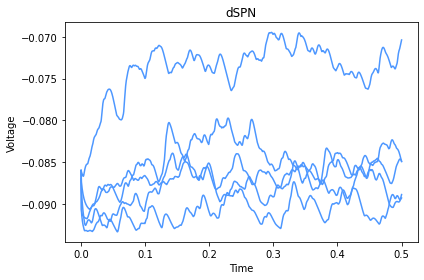

<Figure size 432x288 with 0 Axes>

Saving to figure networks/net_1000/figs/Network-spikes-666-dSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [1, 3, 4, 7, 8]
Plotted 5 traces (total 999)


<Figure size 432x288 with 0 Axes>

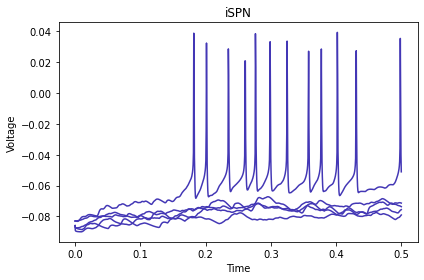

<Figure size 432x288 with 0 Axes>

Saving to figure networks/net_1000/figs/Network-spikes-666-iSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [84, 130, 172, 318, 361]
Plotted 5 traces (total 999)


<Figure size 432x288 with 0 Axes>

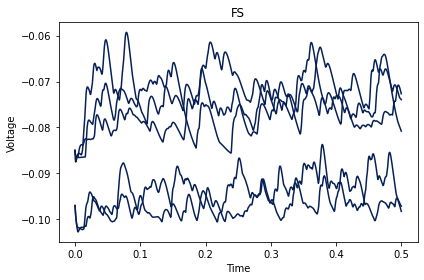

<Figure size 432x288 with 0 Axes>

Saving to figure networks/net_1000/figs/Network-spikes-666-FSN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [141, 271, 336, 564, 668]
Plotted 5 traces (total 999)


<Figure size 432x288 with 0 Axes>

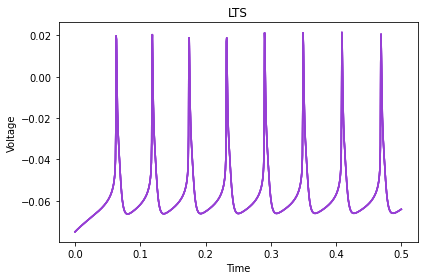

<Figure size 432x288 with 0 Axes>

Saving to figure networks/net_1000/figs/Network-spikes-666-LTS-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [83, 234, 353, 387, 388]
Plotted 5 traces (total 999)


<Figure size 432x288 with 0 Axes>

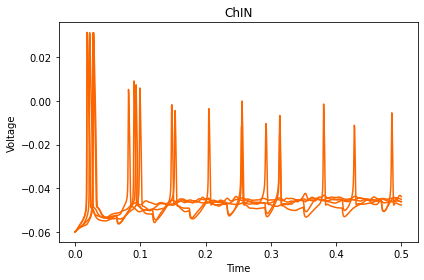

<Figure size 432x288 with 0 Axes>

Saving to figure networks/net_1000/figs/Network-spikes-666-ChIN-colour.png


<Figure size 432x288 with 0 Axes>

In [5]:
from snudda.plotting.Network_plot_traces import NetworkPlotTraces

plotOffset = 0
skipTime = 0
nTracesMax = 5

fileName = "networks/net_1000/simulation/volt.txt"
npt = NetworkPlotTraces(fileName,networkFile)
networkFile = "networks/net_1000/network-pruned-synapses.hdf5"
    
npt.plotTraceNeuronType(neuronType="dSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="iSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="FSN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="LTS",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="ChIN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)


Simulation analysis plots are saved as PDF files in the directory `networks/net_1000/figures`.

In [8]:
!ls networks/net_1000/figures/*.pdf

networks/net_1000/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-ChIN-to-FSN-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-ChIN-to-LTS-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-dSPN-to-ChIN-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-FSN-to-dSPN-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-gapjunctions-2D-dist.pdf
networks/ne

## Closing remarks

This example creates a very small striatal network. Size of the network and other parameters can be adjusted. For more information, please see https://github.com/Hjorthmedh/Snudda/wiki/Developer-Installation-Guide.

Questions and suggestions related to *Snudda* simulations, please address to the main developer, *Johannes Hjorth* [hjorth@kth.se](mailto:hjorth@kth.se).